In [4]:

import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #разделение выборки
import plotly.express as px

In [5]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


* age — возраст основного бенефициара;
* sex — пол страхового подрядчика;
* bmi — индекс массы тела (кг на м), в идеале — от 18.5 до 24.9;
* children — количество детей, охваченных медицинской страховкой;
* smoker — является ли человек курящим;
* region — жилой район США (северо-восток, юго-восток, северо-запад, юго-запад);
* charges (целевой признак) — индивидуальные медицинские расходы, оплачиваемые медицинской страховкой.

In [6]:
print(data.shape)

(1338, 7)


In [7]:
display(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
display(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Прежде чем приступать к этапу подготовки данных для модели, вы можете произвести небольшое исследование зависимостей в данных, например построить следующие графики и диаграммы:

* гистограммы/коробчатые диаграммы числовых признаков;
* столбчатые диаграммы медианных медицинских расходов в зависимости от категориальных признаков;
* диаграммы рассеяния зависимости целевого признака от других числовых в разрезе категориальных (обратите особенное внимание на зависимость медицинских расходов от признака курения).

In [9]:
#Построим распределения числовых признаков и приближение из зависимостей от целевого линейной регрессией
types = data.dtypes
num_features = list(types[(types != 'object')].index)
n = len(num_features)

for feature in num_features: #i- индекс, feature - название признака в таблице
    
    fig = px.histogram(
    data, x=feature, marginal='box')
    fig.show()
    
    fig = px.scatter(
    data, x=feature, y='charges', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue')
    fig.show()
    
plt.tight_layout() #выравнивание графиков

<Figure size 640x480 with 0 Axes>

In [10]:
# Построим столючатые диаграммы медиан целевого признака в зависимости от категориальных

obj_features = list(types[(types == 'object')].index)
n = len(obj_features)

for feature in obj_features: 
    
    df = data.groupby(feature)['charges'].median()
    fig = px.bar(df, text_auto=True)
    fig.show()

In [11]:
#Построим диаграммы рассеяния целевого признака от числовых в разрезе категориалных признаков


for n_feature in num_features:
    for o_feature in obj_features:
        fig = px.scatter(
        data, x=n_feature, y='charges', opacity=0.65, color=o_feature)
        fig.show()
        
    
    

Кодировку будем совершать по следующему принципу:

* smoker — переведём в бинарные значения (0 — некурящий, 1 — курящий);
* sex — аналогично (0 — female, 1 — male);
* region — используем OneHot-кодирование (воспользуемся функцией get_dummies).

In [12]:
#кодируем бинарные категориальные признаки
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)
#оставшиеся категориальные признаки кодируем с помощью OneHot
data = pd.get_dummies(data)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


Выделим факторы и целевой признак в отдельные таблицы:

In [13]:
features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']

In [14]:
#Задание 6.1
#Прежде чем переходить к этапу моделирования, нам необходимо позаботиться о создании выборки для тестирования модели.
#Разделите набор данных на тренировочную и тестовую выборки в соотношении 80/20. Воспользуйтесь функцией train_test_split.
#В качестве значения параметра random_state укажите число 42.
#Чему равно количество наблюдений в тестовом наборе данных?

In [15]:
#Создаем тренировочную и тестовую выборки с помощью train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, #таблица с наблюдениями и столбец с правильным ответами
    test_size=0.2, #размер тестовой выборки
    random_state=42 #число отвечающее за генерацию случайных чисел
)
#Выводим размеры полученных выборок
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1070, 9)
Test shape: (268, 9)


In [16]:
#Задание 6.2
#Обучите модель линейной регрессии аналитическим методом (LinearRegression) на тренировочном наборе данных. 
# Все параметры оставьте по умолчанию.
#Чему равен свободный член (intercept) обученной модели? Ответ округлите до сотых.

In [17]:
lr = linear_model.LinearRegression()
#Обучаем модель - ищем параметры
lr.fit(X_train, y_train)
lr.intercept_

-12390.804294570285

In [18]:
#Задание 6.3
#С помощью модели, полученной в предыдущем задании, сделайте предсказание на тренировочной и тестовой выборке. 
# Рассчитайте следующие три метрики: R2, MAE, MAPE. Не забудьте привести значение  MAPE к процентам.
#Значение R2 округлите до трёх знаков после точки-разделителя, а значения  MAE и MAPE  — до целого числа.
#Чему равны значения метрик на тренировочной и тестовой выборках?

In [19]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

In [20]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.742
Train MAE: 4208.235
Train MAPE: 42.203


Test R^2: 0.784
Test MAE: 4181.194
Train MAPE: 46.888


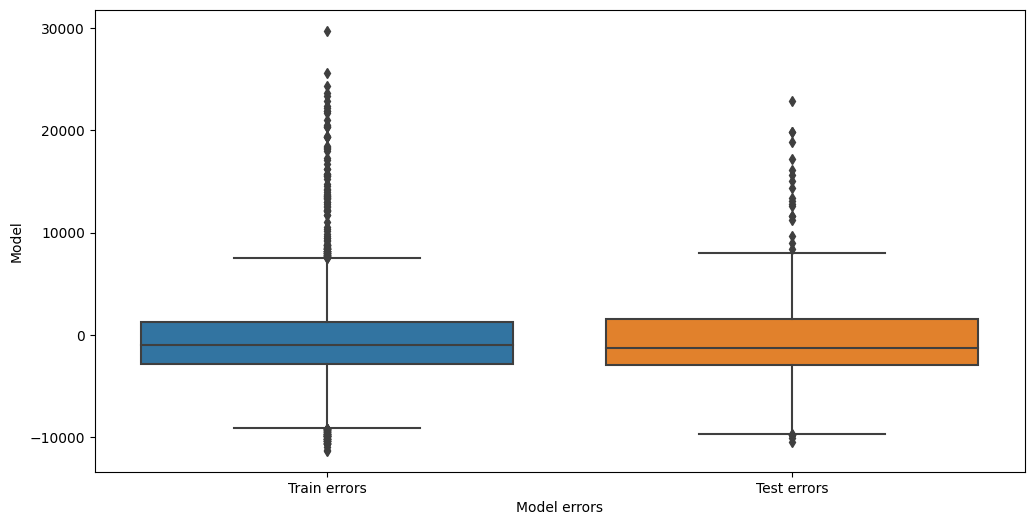

In [21]:
#Задание 6.4
#Постройте диаграмму boxplot для визуализации ошибок модели линейной регрессии на тренировочной и тестовой выборках. 
# В качестве ошибки возьмите разницу между истинным ответом и предсказанием: y-y-предск (без модуля).
#Визуализируем ошибки

import matplotlib.pyplot as plt #для визуализации
fig, ax = plt.subplots(figsize=(12, 6)) #фигура+координатная плоскость
#Ошибки модели на тренировочной выборке 
y_train_errors = y_train - y_train_pred
#Ошибки модели на тестовой выборке
y_test_errors = y_test - y_test_pred
#Для удобства визуализации составим DataFrame из ошибок
predict_df = pd.DataFrame(
    {'Train errors': y_train_errors, 
     'Test errors': y_test_errors
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=predict_df, ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

In [ ]:
#Задание 6.5
#Нормализуйте тренировочную и тестовую выборки с помощью min-max-нормализации (MinMaxScaler). 
# Расчёт параметров нормализации (fit) произведите на тренировочной выборке.

#На нормализованных данных сгенерируйте полиномиальные признаки степени 2. 
# Воспользуйтесь классом PolynomialFeatures из библиотеки sklearn. Значение параметра include_bias выставите на False.

In [22]:
#Создаем объект для min-max нормализации
scaler = preprocessing.MinMaxScaler()
#Вычисляем параметры для нормализации - min и max для каждого столбца
scaler.fit(X_train)
#Производим преобразование для каждой из выборок
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Создаем объект для генерации полиномиальных признаков степени 2
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
#Вычисляем параметры генерации - результирующее количество признак
poly.fit(X_train_scaled)
#Производим преобразование для каждой из выборок
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

print('Train shape: {}'.format(X_train_scaled_poly.shape))
print('Test shape: {}'.format(X_test_scaled_poly.shape))

Train shape: (1070, 54)
Test shape: (268, 54)


In [23]:
#Задание 6.6
#Обучите модель линейной регрессии на полиномиальных признаках.
#Чему равно значение метрики  на тестовой выборке?
#Значение R2 округлите до трёх знаков после запятой.

lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_scaled_poly, y_train)
y_train_pred = lr_poly.predict(X_train_scaled_poly)
y_test_pred = lr_poly.predict(X_test_scaled_poly)

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.842
Train MAE: 2912.958
Train MAPE: 29.808


Test R^2: 0.866
Test MAE: 2762.470
Train MAPE: 30.738


In [24]:
#Задание 6.7
#Выведите значения коэффициентов полученной модели. Посмотрите на степени коэффициентов.
#Какой вывод можно сделать?

print(np.round(lr_poly.coef_, 3))

[-3.71105135e+16  2.90624807e+17 -7.81502356e+15  1.52571599e+15
 -8.85674845e+15 -2.58845363e+16 -1.77612957e+17 -7.20024939e+16
 -4.46806128e+16  8.44000000e+03  8.42000000e+02  9.18000000e+02
 -1.82200000e+03  2.52000000e+02  3.71105135e+16  3.71105135e+16
  3.71105135e+16  3.71105135e+16 -2.48025958e+17  7.83250000e+02
 -1.32012500e+03  3.07250000e+02 -4.25988491e+16 -4.25988491e+16
 -4.25988491e+16 -4.25988491e+16 -9.52918800e+03  1.69346900e+03
  5.48946090e+04  7.81502356e+15  7.81502356e+15  7.81502356e+15
  7.81502356e+15 -2.08000000e+03 -2.25400000e+03 -1.52571599e+15
 -1.52571599e+15 -1.52571599e+15 -1.52571599e+15 -2.35115674e+16
  3.23683159e+16  3.23683159e+16  3.23683159e+16  3.23683159e+16
 -3.73724177e+16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.14356003e+17  0.00000000e+00  0.00000000e+00  8.74553994e+15
  0.00000000e+00 -1.85763413e+16]


In [26]:
#Задание 6.8
#Постройте линейную регрессию с L1-регуляризацией (Lasso) на полиномиальных признаках. 
#В качестве параметра alpha используйте значение по умолчанию, параметр max_iter установите в значение 2000.
#Чему равны метрики R2, MAE и MAPE на тестовой выборке?
#Значение  округлите до трёх знаков после запятой, а значения  и  до целого числа.

lasso_lr_poly = linear_model.Lasso(max_iter = 2000)
#Обучаем модель
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)

print_metrics(y_train, y_train_predict_poly, y_test, y_test_predict_poly)

Train R^2: 0.842
Train MAE: 2890.473
Train MAPE: 29.401


Test R^2: 0.867
Test MAE: 2719.334
Train MAPE: 30.070


In [28]:
#Посмотрите на степени параметров модели после регуляризации. Сделайте вывод для себя.
print(np.round(lasso_lr_poly.coef_, 3))

[ 3.2422170e+03 -4.9231400e+02  5.0761230e+03  4.5836210e+03
  1.9792860e+03  1.8802600e+02 -4.7077500e+02  5.8365700e+02
 -2.4354300e+02  8.2982680e+03  7.7458200e+02  8.4444900e+02
 -1.2077570e+03  1.3481000e+02 -1.0430970e+03 -0.0000000e+00
  1.1696420e+03  1.6176560e+03 -0.0000000e+00  5.0584800e+02
 -1.1342520e+03  2.6579700e+02 -1.2224050e+03  0.0000000e+00
  2.3621300e+02 -5.8003100e+02 -8.1796330e+03  1.2948780e+03
  5.4714855e+04  3.5853190e+03  2.4069020e+03 -9.6354900e+02
  0.0000000e+00 -1.6746430e+03 -2.0543650e+03  1.9420490e+03
  1.9539440e+03 -0.0000000e+00 -1.0636440e+03  8.0060000e+00
  5.9368900e+02 -0.0000000e+00 -2.3064300e+02  1.9793350e+03
  6.3161600e+02  0.0000000e+00  0.0000000e+00  0.0000000e+00
 -0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00 -6.0600000e-01]


In [29]:
#Задание 6.9
#Постройте линейную регрессию с L2-регуляризацией на полиномиальных признаках. В качестве параметра alpha используйте значение по умолчанию.
#Чему равны метрики ,  и  на тестовой выборке?
#Значение  округлите до трёх знаков после запятой, а значения  и  до целого числа.

#Инициализируем объект класса линейная регрессия с L2-регуляризацией 
ridge_lr_poly = linear_model.Ridge()
#Обучаем модель предсказывать логарифм целевого признака
ridge_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для каждой из выборок
#Если обучили на логарифме, то от результата необходимо взять обратную функцию - экспоненту
y_train_pred = ridge_lr_poly.predict(X_train_scaled_poly)
y_test_pred = ridge_lr_poly.predict(X_test_scaled_poly)
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.839
Train MAE: 2948.804
Train MAPE: 29.546


Test R^2: 0.863
Test MAE: 2860.555
Train MAPE: 31.380
